In [1]:
from encoder import Model
from matplotlib import pyplot as plt
from utils import sst_binary, train_with_reg_cv
import seaborn as sns
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14288571945864211411, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3157432729
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17277739087095732241
 physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [2]:
model = Model()de

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
dim is deprecated, use axis instead


In [3]:
trX, vaX, teX, trY, vaY, teY = sst_binary()

In [4]:
trXt = model.transform(trX)

347.512 seconds to transform 6920 examples


In [11]:
vaXt = model.transform(vaX)

29.180 seconds to transform 872 examples


In [5]:
teXt = model.transform(teX)

59.108 seconds to transform 1821 examples


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
dim is deprecated, use axis instead
1596.083 seconds to transform 6920 examples
262.396 seconds to transform 872 examples
468.513 seconds to transform 1821 examples


In [6]:
# classification results
full_rep_acc, c, nnotzero = train_with_reg_cv(trXt, trY, vaXt, vaY, teXt, teY)
print('%05.2f test accuracy'%full_rep_acc)
print('%05.2f regularization coef'%c)
print('%05d features used'%nnotzero)

c:\users\awhite\.virtualenvs\generating-reviews-discovering-sentiment-sdajysrm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\awhite\.virtualenvs\generating-reviews-discovering-sentiment-sdajysrm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\awhite\.virtualenvs\generating-reviews-discovering-sentiment-sdajysrm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\awhite\.virtualenvs\generating-reviews-discovering-sentiment-sdajysrm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

91.76 test accuracy
00.25 regularization coef
00145 features used


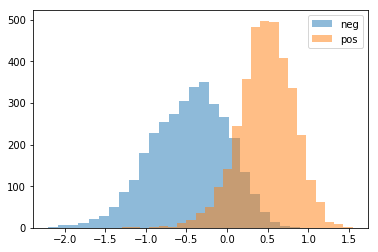

In [7]:
# visualize sentiment unit
sentiment_unit = trXt[:, 2388]
plt.hist(sentiment_unit[trY==0], bins=25, alpha=0.5, label='neg')
plt.hist(sentiment_unit[trY==1], bins=25, alpha=0.5, label='pos')
plt.legend()
plt.show()

In [10]:

'''This method returns the list of outputs for the specified neurons as and when the text is 
processed by the model
'''
import numpy as np

def get_tracked_neuron_values_for_a_review(model, review_text, track_indices):
    feats, tracked_indices_values = model.transform([review_text], track_indices=track_indices)
    return np.array([np.array(vals).flatten() for vals in tracked_indices_values])

In [16]:
'''This method plots the neuron values as a heatmap.
'''
import utils

def plot_neuron_heatmap(text, values):
    values = values.flatten()
    preprocessed_text = utils.preprocess(text).decode()
    n_limit = 64
    num_chars = len(preprocessed_text)

    for i in np.arange(0, len(values), n_limit):
        if i + n_limit > num_chars:
            end_index = num_chars
            #num_values_to_read = num_chars - i
            #values_limited = values[-num_values_to_read:]
            #values_reshaped = values_limited.reshape((1, num_values_to_read))
        else:
            end_index = i+n_limit
            
        values_limited = values[i:end_index]
        data = values_limited.reshape((1, min([n_limit, len(values_limited)])))
        labels = np.array([x for x in preprocessed_text[i:end_index]]).reshape((1, min([n_limit, len(values_limited)])))
#         labels[0,len(labels):n_limit] = ' '
#         data[0,len(data):n_limit] = 0.0
        fig, ax = plt.subplots(figsize=(20,0.5))
        ax = sns.heatmap(data, annot = labels, fmt = '', annot_kws={"size":15}, vmin=-1, vmax=1, cmap='RdYlGn')

In [24]:
text = "I was very pleased with the service I received; however, the food was terrible and the AC was on way too high.  Not sure I will return."

In [25]:
sentiment_neuron_index = 2388
neuron_values = get_tracked_neuron_values_for_a_review(model, text, [sentiment_neuron_index])

1.649 seconds to transform 1 examples


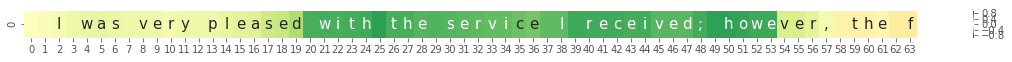

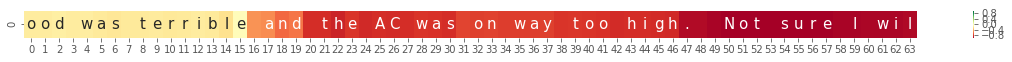

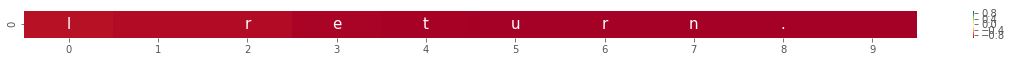

In [27]:
plot_neuron_heatmap(text, neuron_values)